In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla
from scipy.integrate import solve_ivp
%matplotlib inline

In [69]:
class Wolf:
    def __init__(self,x,y,hunger):
        self.x = x
        self.y = y
        self.hunger = hunger
        self.timeALive = 1
class Rabbit:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.timeALive = 1

class World:
    def __init__(self,height,width,reproduce_rabbit_prob,reproduce_wolf_prob,hunt_wolf_prob,number_of_rabbits,number_of_wolves,wolf_hunger,lifespan_rabbit,lifespan_wolf):
        self.height = height
        self.width = width
        self.reproduce_rabbit_prob = reproduce_rabbit_prob
        self.reproduce_wolf_prob = reproduce_wolf_prob
        self.hunt_wolf_prob = hunt_wolf_prob
        self.wolf_hunger = wolf_hunger
        self.wolves_poblation = self.populate(number_of_wolves,1)
        self.rabbits_poblation = self.populate(number_of_rabbits,0)
        self.lifespan_wolf= lifespan_wolf
        self.lifespan_rabbit= lifespan_rabbit

    def populate(self,number_of_animals,animal):
        poblation = []
        if animal:
            for i in range(number_of_animals):
                x = np.random.randint(0,self.width)
                y = np.random.randint(0,self.height)
                hunger = self.wolf_hunger
                poblation.append(Wolf(x, y, hunger) )
        else:
            for i in range(number_of_animals):
                x = np.random.randint(0,self.width)
                y = np.random.randint(0,self.height)
                poblation.append(Rabbit(x, y))
        return poblation
                
    def printAnimals(self,animal):
        if animal:
            for wolf in self.wolves_poblation:
                print("Wolf:",wolf.x,wolf.y,wolf.hunger)
        else:
            for rabbit in self.rabbits_poblation:
                print("Rabbit:",rabbit.x,rabbit.y)
    def poblation_count(self):
        return len(self.wolves_poblation),len(self.rabbits_poblation)

    def graphWorld(self,figsize=(5,5)):
        wolves_x= []
        wolves_y= []
        for wolf in self.wolves_poblation:
                wolves_x.append(wolf.x)
                wolves_y.append(wolf.y)
                
        rabbits_x= []
        rabbits_y= []
        for rabbit in self.rabbits_poblation:
                rabbits_x.append(rabbit.x)
                rabbits_y.append(rabbit.y)

        plt.figure(figsize=figsize)
        #plt.xticks([i for i in range(self.width+1)])
        plt.xlim(-1,self.width+1)
        #plt.yticks([i for i in range(self.height+1)])
        plt.ylim(-1,self.height+1)
        plt.plot([0,0,self.width-1,self.height-1,0],[0,self.width-1,self.height-1,0,0],"r--",alpha=0.5)
        plt.scatter(rabbits_x,rabbits_y,marker="*",s=200,c="blue",label="rabbit")
        plt.scatter(wolves_x,wolves_y,marker="*",s=100,c="red",label="wolf",alpha=0.5)
        plt.legend(loc="best")
        plt.grid()
        plt.show()

    def move(self):
        moves= [-1,0,1] 
        moves2= [-2,-1,0,1,2] 
        for wolf in self.wolves_poblation:
            x = wolf.x + np.random.choice(moves2)
            y = wolf.y +np.random.choice(moves2)
            if x >= self.width:
                x = x%self.width
            elif x < 0:
                x = self.height-abs(x)
            if y >= self.height:
                y = y%self.height
            elif y < 0:
                y = self.height-abs(y)
            wolf.x = x
            wolf.y = y
            
        for rabbit in self.rabbits_poblation:
            x = rabbit.x + np.random.choice(moves)
            y = rabbit.y + np.random.choice(moves)
            if x >= self.width:
                x = 0
            elif x < 0:
                x = self.height-1
            if y >= self.height:
                y = 0
            elif y < 0:
                y = self.height-1
            rabbit.x = x
            rabbit.y = y

    def reproduce(self):
        offset = [-1,0,1] 
        new_wolves=[]
        new_rabbits=[]
        for wolf in self.wolves_poblation:
            prob=np.random.rand(1)
            if wolf.hunger>0 and prob<self.reproduce_wolf_prob:
                x = wolf.x + np.random.choice(offset)
                y = wolf.y + np.random.choice(offset)
                if x >= self.width:
                    x = 0
                elif x < 0:
                    x = self.height-1
                if y >= self.height:
                    y = 0
                elif y < 0:
                    y = self.height-1
                hunger=self.wolf_hunger
                new_wolves.append(Wolf(x, y, hunger))

        for rabbit in self.rabbits_poblation:
            prob=np.random.rand(1)
            if prob<self.reproduce_rabbit_prob:
                x = rabbit.x + np.random.choice(offset)
                y = rabbit.y + np.random.choice(offset)
                if x >= self.width:
                    x = 0
                elif x < 0:
                    x = self.height-1
                if y >= self.height:
                    y = 0
                elif y < 0:
                    y = self.height-1
                new_rabbits.append(Rabbit(x, y))
        self.wolves_poblation+=new_wolves
        self.rabbits_poblation+=new_rabbits
    def hunger(self):
        for wolf in self.wolves_poblation:
            wolf.hunger-=1
    def time(self):
        for wolf in self.wolves_poblation:
            wolf.timeALive+=1
        for rabbit in self.rabbits_poblation:
           rabbit.timeALive+=1
    def death(self):
        survived_wolves=[]
        survived_rabbits=[]
        for wolf in self.wolves_poblation:
            if wolf.timeALive>lifespan_wolf or wolf.hunger<0:
                pass 
            else:
                survived_wolves.append(wolf)
        for rabbit in self.rabbits_poblation:
            if rabbit.timeALive>lifespan_rabbit:
                pass 
            else:
                survived_rabbits.append(rabbit)
        self.wolves_poblation=survived_wolves
        self.rabbits_poblation=survived_rabbits
    def hunt(self):
        for wolf in self.wolves_poblation:
            survived_rabbits=[]
            for rabbit in self.rabbits_poblation:
                prob = np.random.rand(1)
                if wolf.x == rabbit.x and wolf.y == rabbit.y and prob>self.hunt_wolf_prob:
                    wolf.hunger = self.wolf_hunger #the rabbit is hunted
                else:
                    survived_rabbits.append(rabbit) #the rabbit survived
            self.rabbits_poblation = survived_rabbits



def main(height,width,reproduce_rabbit_prob,reproduce_wolf_prob,hunt_wolf_prob,number_of_rabbits,number_of_wolves,wolf_hunger,lifespan_rabbit,lifespan_wolf,timeLimit):
    world=World(height, width, reproduce_rabbit_prob, reproduce_wolf_prob, hunt_wolf_prob, number_of_rabbits, number_of_wolves,wolf_hunger,lifespan_rabbit,lifespan_wolf)
    i=1
    wc,rc=number_of_wolves,number_of_rabbits
    wolves_poblation = [wc]
    rabbits_poblation = [rc]
    times = [0]
    timeoffset=5#max(lifespan_wolf,lifespan_rabbit)
    aux=1
    while(i<timeLimit):
        world.time()
        world.move()
        world.hunt()
        world.reproduce()
        world.hunger()
        world.death()
        wc,rc = world.poblation_count()
        wolves_poblation.append(wc)
        rabbits_poblation.append(rc)
        times.append(i)
        if (wc<=0 or rc<=0 or wc>10**4 or rc>10**3):
            aux+=1
            if aux>timeoffset:
                break
        i+=1
    return times,wolves_poblation,rabbits_poblation
    

wolves [6, 7, 11, 17, 18, 25, 32, 35, 41, 42, 44, 40, 32, 25, 18, 11, 10, 10, 9, 10, 9, 7, 10, 14, 19, 23, 28, 39, 50, 64, 58, 47, 35, 23, 18, 12, 10, 6, 3, 4, 4, 4, 6, 7, 9, 13, 18, 28, 40, 58, 79, 98, 93, 63, 36, 20, 9]
rabbits [20, 33, 47, 69, 77, 84, 80, 50, 29, 14, 7, 5, 3, 2, 2, 4, 6, 6, 10, 10, 16, 31, 44, 60, 80, 103, 101, 100, 43, 19, 8, 2, 4, 2, 4, 2, 3, 5, 8, 14, 23, 35, 56, 88, 141, 191, 292, 326, 301, 175, 63, 9, 0, 0, 0, 0, 0]


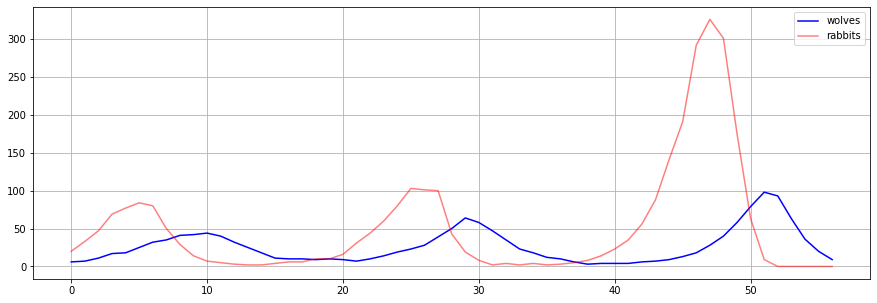

In [290]:
#np.random.seed(31415)
height = 5
width = 5
reproduce_rabbit_prob = .9
reproduce_wolf_prob = .5
hunt_wolf_prob = .3
number_of_rabbits = 20
number_of_wolves = 6
wolf_hunger = 2
lifespan_rabbit = 8
lifespan_wolf = 5
timeLimit = 60


times,wolves_poblation,rabbits_poblation = main(height,width,reproduce_rabbit_prob,reproduce_wolf_prob,hunt_wolf_prob,number_of_rabbits,number_of_wolves,wolf_hunger,lifespan_rabbit,lifespan_wolf,timeLimit)
print("wolves",wolves_poblation)
print("rabbits",rabbits_poblation)
plt.figure(figsize=(15,5))
plt.plot(times,wolves_poblation,c="blue",label="wolves")
plt.plot(times,rabbits_poblation,c="red",label="rabbits",alpha=0.5)
plt.legend(loc="best")
plt.grid()
plt.show()

wolves [50, 78, 116, 118, 89, 82, 82, 65, 46, 29, 30, 34, 39, 51, 62, 74, 96, 130, 154, 168, 196, 185, 164, 139, 101, 65, 51, 46, 37, 24, 23, 28, 34, 46, 63, 80, 104, 141, 175, 191, 203, 202, 150, 100, 56, 22, 8, 6]
rabbits [50, 63, 51, 46, 41, 50, 35, 32, 38, 53, 72, 102, 143, 199, 229, 274, 313, 295, 246, 170, 82, 49, 28, 17, 18, 24, 26, 37, 49, 61, 87, 129, 174, 238, 310, 382, 402, 320, 177, 103, 57, 19, 3, 0, 0, 0, 0, 0]


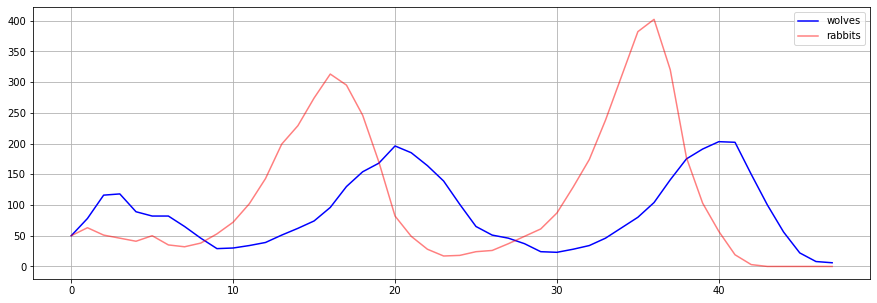

In [318]:
#np.random.seed(31415)
height = 10
width = 10
reproduce_rabbit_prob = .8
reproduce_wolf_prob = .5
hunt_wolf_prob = .3
number_of_rabbits = 50
number_of_wolves = 50
wolf_hunger = 2
lifespan_rabbit = 8
lifespan_wolf = 4
timeLimit = 60


times,wolves_poblation,rabbits_poblation = main(height,width,reproduce_rabbit_prob,reproduce_wolf_prob,hunt_wolf_prob,number_of_rabbits,number_of_wolves,wolf_hunger,lifespan_rabbit,lifespan_wolf,timeLimit)
print("wolves",wolves_poblation)
print("rabbits",rabbits_poblation)
plt.figure(figsize=(15,5))
plt.plot(times,wolves_poblation,c="blue",label="wolves")
plt.plot(times,rabbits_poblation,c="red",label="rabbits",alpha=0.5)
plt.legend(loc="best")
plt.grid()
plt.show()

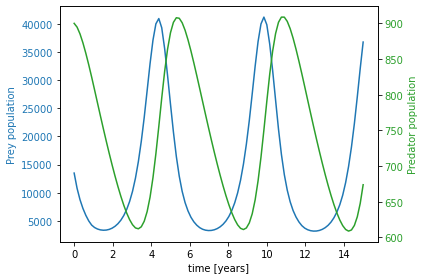

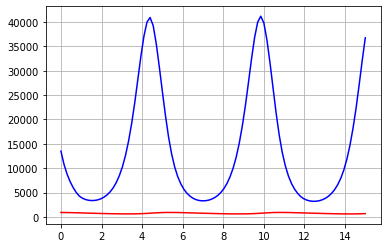

In [319]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# Example 1, numerically.
def f_example_3(t,y,eta,gamma,eps):
    X = y[0]
    Y = y[1]
    
    Xp = eta*X*(1-Y/(eta/gamma))
    Yp = -eps*Y*(1-X/(eps/delta))
    
    return np.array([Xp,Yp])

# Initial condition

eta = 8-1/2
eps = 1/5
gamma = 1/100
delta = eps*gamma/(20*eta)

X_eq = eps/delta
Y_eq = eta/gamma

y0 = np.array([0.9*X_eq, 1.2*Y_eq])

T = 15

# time where we want your solution
t = np.linspace(0, T, 100)
sol = solve_ivp(f_example_3,[0,T], y0, t_eval=t, args=(eta,gamma,eps))

X_output = sol.y[0]
Y_output = sol.y[1]

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('time [years]')
ax1.set_ylabel('Prey population', color=color)
ax1.plot(t, X_output, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Predator population', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Y_output, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

plt.figure()
plt.plot(t,X_output,'b')
plt.plot(t,Y_output,'r')
plt.grid(True)
plt.show()


In [37]:
from scipy.optimize import curve_fit
X_t = X_output[0:98]
X_t1 = X_output[1:99]
Y_t = Y_output[0:98]
Y_t1 = Y_output[1:99]

x_coeff = lambda X,eta,gamma:  eta*X[0]*(1-X[1]/(eta/gamma))
y_coeff = lambda X,eps,delta: -eps*X[1]*(1-X[0]/(eps/delta))
h= 15/100
y1=(X_t1-X_t)/h
y2=(Y_t1-Y_t)/h
(eta,gamma), _ = curve_fit(x_coeff, (X_t, Y_t), y1)
(eps,delta), _ = curve_fit(y_coeff, (X_t, Y_t), y2)
print(eta,gamma,eps,delta)

7.427072242748089 0.009958358703663519 0.20190552325296995 1.337807774740178e-05


In [320]:
from scipy.optimize import curve_fit

X_t = wolves_poblation[0:len(times)-1]
X_t1 = wolves_poblation[1:len(times)]
Y_t = rabbits_poblation[0:len(times)-1]
Y_t1 = rabbits_poblation[1:len(times)]

x_coeff = lambda X,eta,gamma:  eta*X[0]*(1-X[1]/(eta/gamma))
y_coeff = lambda X,eps,delta: -eps*X[1]*(1-X[0]/(eps/delta))

h= 15/100
y1=(X_t1-X_t)/h
y2=(Y_t1-Y_t)/h
(eta,gamma), _ = curve_fit(x_coeff, (X_t, Y_t), y1)
(eps,delta), _ = curve_fit(y_coeff, (X_t, Y_t), y2)
print(eta,gamma,eps,delta)

3.6760121282678906 0.04123268613717692 1.3582807380304784 0.010661168621091191


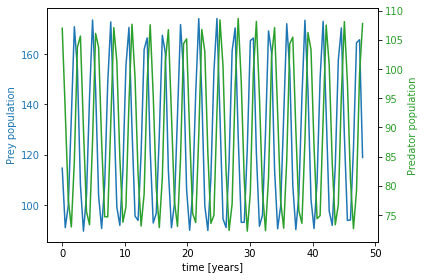

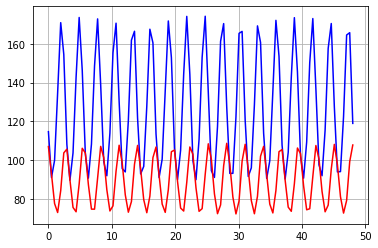

In [321]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# Example 1, numerically.
def f_example_3(t,y,eta,gamma,eps):
    X = y[0]
    Y = y[1]
    
    Xp = eta*X*(1-Y/(eta/gamma))
    Yp = -eps*Y*(1-X/(eps/delta))
    
    return np.array([Xp,Yp])

# Initial condition
#eta = 8-1/2
#eps = 1/5
#gamma = 1
# delta = eps*gamma/(20*eta)

X_eq = eps/delta
Y_eq = eta/gamma

y0 = np.array([0.9*X_eq, 1.2*Y_eq])

T = len(times)

# time where we want your solution
t = np.linspace(0, T, 100)
sol = solve_ivp(f_example_3,[0,T], y0, t_eval=t, args=(eta,gamma,eps))

X_output = sol.y[0]
Y_output = sol.y[1]

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('time [years]')
ax1.set_ylabel('Prey population', color=color)
ax1.plot(t, X_output, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Predator population', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Y_output, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

plt.figure()
plt.plot(t,X_output,'b')
plt.plot(t,Y_output,'r')
plt.grid(True)
plt.show()

